In [18]:
import json
import pandas as pd
import requests

def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None


record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())            

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


<ipython-input-18-e0ad67aafaa2>:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))


In [19]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

In [24]:
def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
print('Before rename')
print(df_countries.head())
print('')
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]
print('After rename')
print(df_countries.head())



Before rename
          name alpha2 alpha3 numeric  latitude  longitude
0  Afghanistan     AF    AFG     004      33.0       65.0
1      Albania     AL    ALB     008      41.0       20.0
2      Algeria     DZ    DZA     012      28.0        3.0
3      Andorra     AD    AND     020      42.5        1.5
4       Angola     AO    AGO     024     -12.5       18.5

After rename
          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


<ipython-input-24-097a2cf489ae>:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_countries = pd.io.json.json_normalize(get_json(countries_url))


In [25]:

df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-08-16  5401167  170019    1833067  United States of America
1      BR  2020-08-16  3340197  107852    2655017                    Brazil
2      IN  2020-08-16  2589682   49980    1862258                     India
3      RU  2020-08-16   920719   15653     731444        Russian Federation
4      ZA  2020-08-16   587345   11839     472377              South Africa


                                                  name  fatality_ratio
134                                              Yemen        0.283574
11   United Kingdom of Great Britain and Northern I...        0.146065
16                                               Italy        0.139401
36                                             Belgium        0.127586
105                                            Hungary        0.123678
17                                              France        0.120214
6                                               Mexico        0.109217
191                                     Western Sahara        0.100000
40                                         Netherlands        0.096104
10                                               Spain        0.083477
153                                               Chad        0.079498
23                                              Canada        0.073175
33                                              Sweden        0.068605
145   

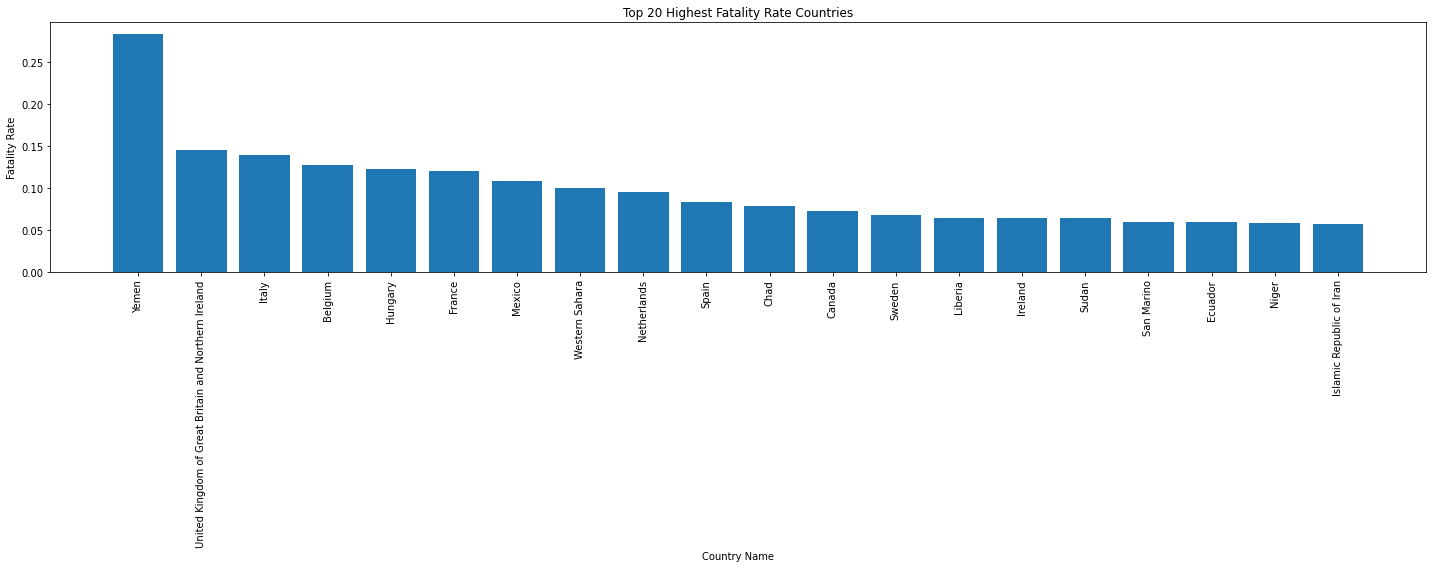

In [29]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)
print(df_top_20_fatality_rate[['name','fatality_ratio']].head(20))
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:

countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
    covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
    df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
    df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
    df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
    if i==0:
        df_covid_timeline_merged = df_covid_timeline
    else:
        df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
    i=i+1

print(df_covid_timeline_merged.head())

<ipython-input-30-5d49c6fa2431>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))


  country last_update  cases  deaths  recovered
0      VN  2021-02-06   1976      35       1465
1      VN  2021-02-05   1976      35       1465
2      VN  2021-02-04   1957      35       1465
3      VN  2021-02-03   1911      35       1461
4      VN  2021-02-02   1882      35       1460


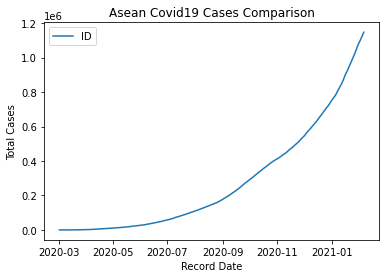

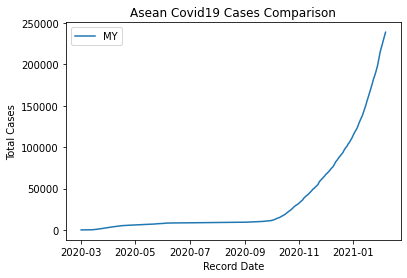

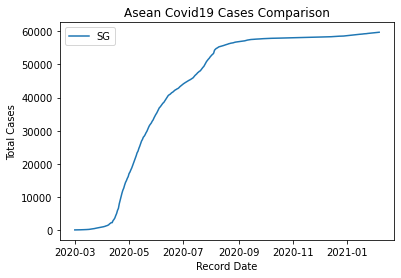

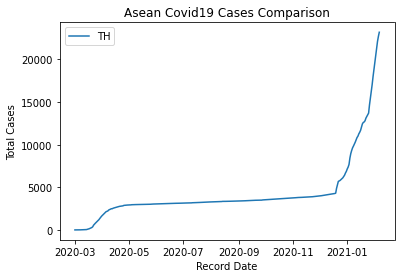

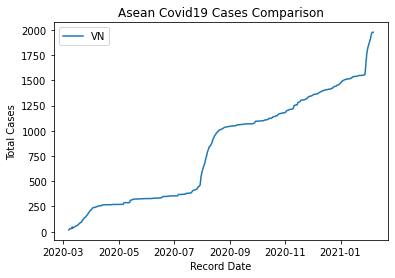

In [67]:

df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]


import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
    country_data = df_covid_timeline_denormalized['country']==country
    x = df_covid_timeline_denormalized[country_data]['last_update']
    y = df_covid_timeline_denormalized[country_data]['cases']
    plt.plot(x, y, label = country)

    plt.legend()
    plt.xlabel('Record Date')
    plt.ylabel('Total Cases')
    plt.title('Asean Covid19 Cases Comparison')
    plt.show()

In [75]:
print(df_covid_timeline_denormalized.head())
print(df_covid_timeline_denormalized['country'].unique())


  country last_update  cases  deaths  recovered      name
0      VN  2021-02-06   1976      35       1465  Viet Nam
1      VN  2021-02-05   1976      35       1465  Viet Nam
2      VN  2021-02-04   1957      35       1465  Viet Nam
3      VN  2021-02-03   1911      35       1461  Viet Nam
4      VN  2021-02-02   1882      35       1460  Viet Nam
['VN' 'TH' 'SG' 'MY' 'ID']
